In [11]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

# Task 1

In [21]:
def rbf_kernel(x1, x2, scale):
    """
    The radial basis function kernel is used to calculate the similarity between two data points x1 and x2.
    scale: a hyperparameter that controls the width of the kernel
    """
    return exp(-1 * (np.linalg.norm(x1-x2) ** 2) / (2*scale**2))

def cov_matrix(x, scale):
    """
    The covariance matrix is created by pairwise evaluation of the kernel function on the input data points.
    """
    return np.array([[rbf_kernel(x1,x2, scale) for x2 in x] for x1 in x])

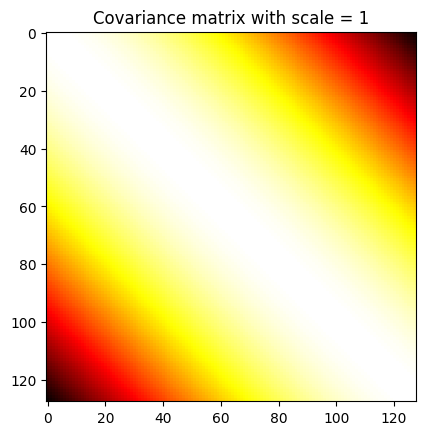

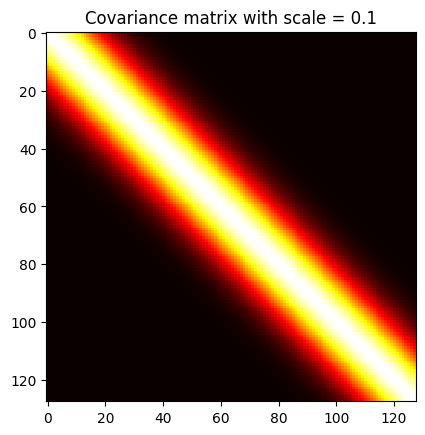

In [22]:
X = np.linspace(0, 1, 128)

sigma = cov_matrix(X, 1)

plt.imshow(sigma, cmap='hot', interpolation='nearest')
plt.title('Covariance matrix with scale = 1')
plt.show()

sigma = cov_matrix(X, 0.1)

plt.imshow(sigma, cmap='hot', interpolation='nearest')
plt.title('Covariance matrix with scale = 0.1')
plt.show()

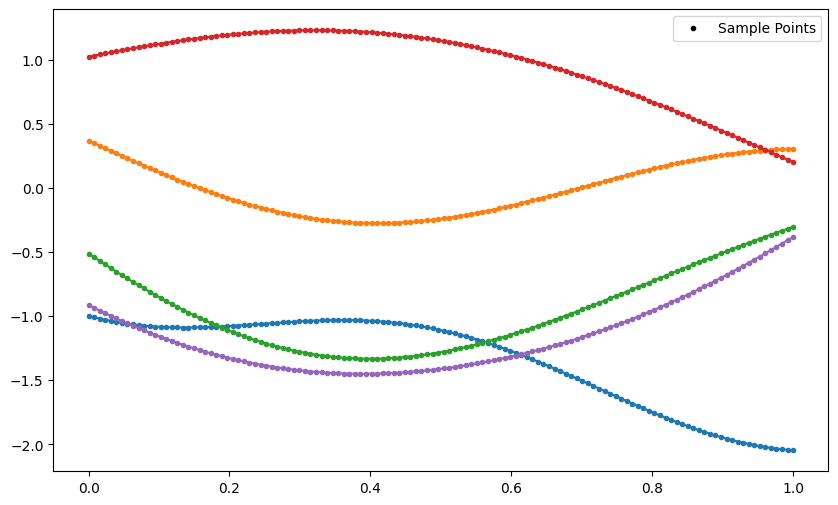

In [80]:
def sample_functions(X, scale, number_of_functions=1):
    """
    Sample functions from the prior distribution
    """
    sigma = cov_matrix(X, scale)
    # Assume a mean of 0 for simplicity
    mean = np.zeros(X.shape[0])
    ys = np.random.multivariate_normal(
        mean=mean, cov=sigma, 
        size=number_of_functions)
    
    return ys

ys = sample_functions(X, 0.5, 5)

plt.figure(figsize=(10,6))
plt.plot(X, ys.T, marker='.')
plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.legend()
plt.show()

[0.53923687 0.35205933 0.40217135 0.17466438 0.06352209]


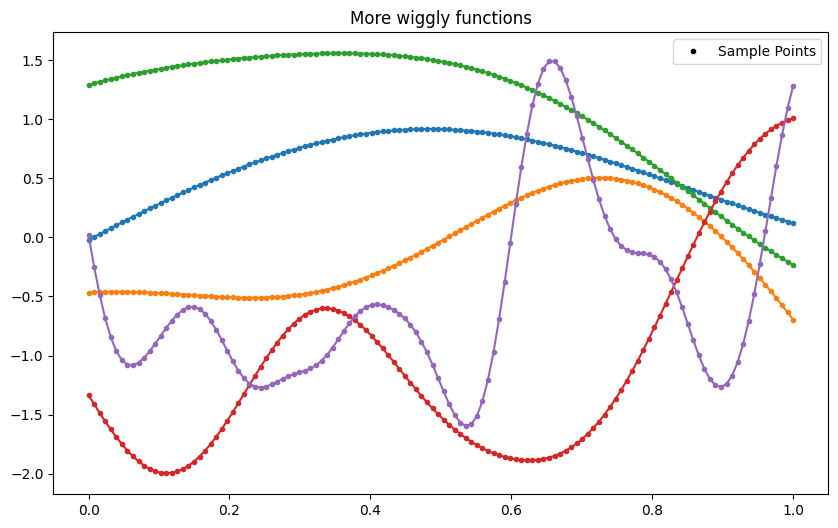

[0.63885733 0.35828869 0.3295166  0.47458294 0.22658967]


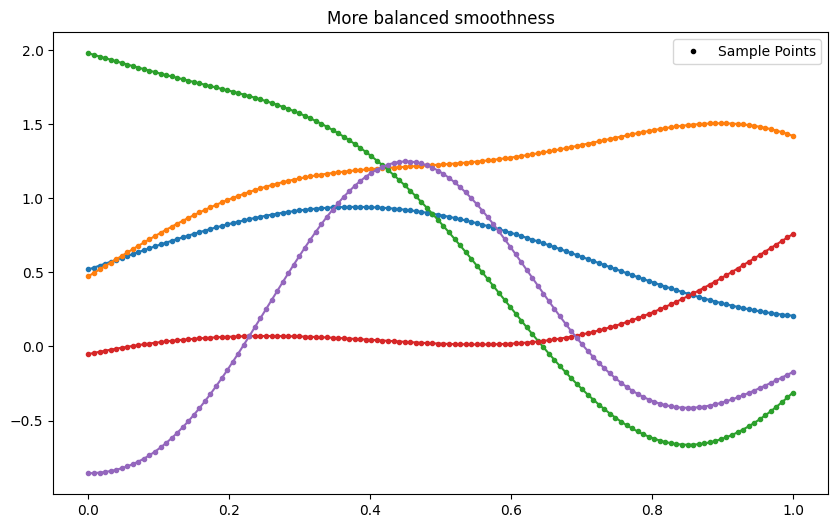

[0.90720517 0.40096965 0.80897555 0.76915431 0.70223642]


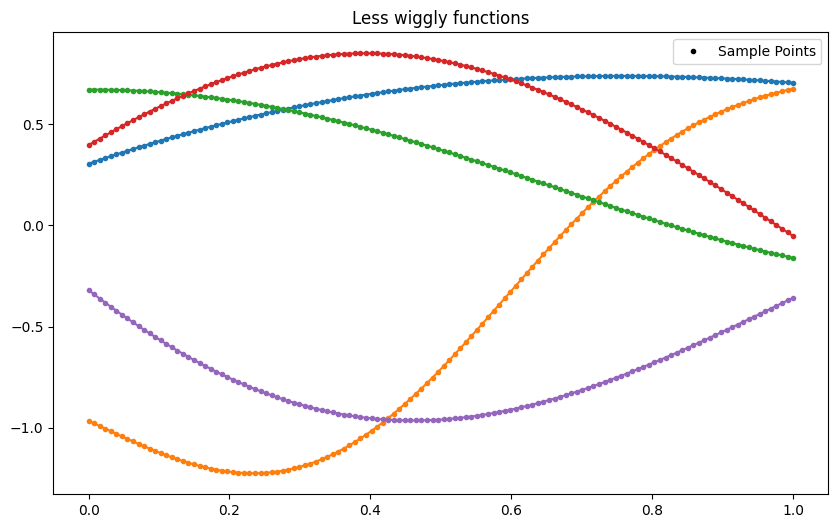

In [106]:
rng = np.random.default_rng()
# more wiggly functions
sample = rng.beta(a=2, b=5, size=5)
print(sample)
ys = [sample_functions(X, scale=s) for s in sample]

plt.figure(figsize=(10,6))
[plt.plot(X, y.T, marker='.') for y in ys]
plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('More wiggly functions')
plt.legend()
plt.show()

# more balanced smoothness
sample = rng.beta(a=3, b=3, size=5)
print(sample)
ys = [sample_functions(X, scale=s) for s in sample]

plt.figure(figsize=(10,6))
[plt.plot(X, y.T, marker='.') for y in ys]
plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('More balanced smoothness')
plt.legend()
plt.show()
# less wiggly functions
sample = rng.beta(a=5, b=2, size=5)
print(sample)
ys = [sample_functions(X, scale=s) for s in sample]

plt.figure(figsize=(10,6))
[plt.plot(X, y.T, marker='.') for y in ys]
plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('Less wiggly functions')
plt.legend()
plt.show()